In [3]:
import pandas as pd
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Wczytanie danych

In [4]:
df = pd.read_csv("../../clustering_R3.csv")

## Podstawowe informacje o zbiorze

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   X3      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


Nie mamy żadnych braków.

In [6]:
df.describe()

,X1,X2,X3
count,1000.000000,1000.000000,1000.000000
mean,240.181036,154.937365,5.454947
std,115.556334,41.964161,4.793973
min,38.516347,87.376621,0.125057
25%,148.801776,104.853322,1.806255
50%,231.754437,151.846118,3.430892
75%,350.277958,198.367658,8.287805
max,399.930758,213.917568,24.537806


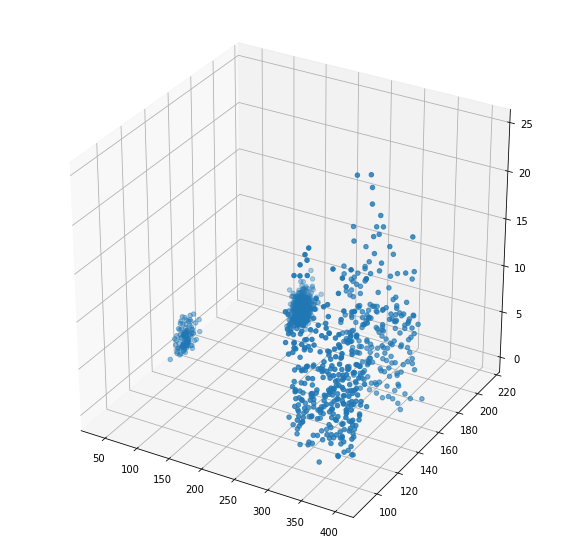

In [7]:
def plot3D(df):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    z = df.iloc[:, 2]
    ax.scatter3D(x, y, z)
plot3D(df)

## Standaryzacja

In [8]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns]) 

In [9]:
df.describe()

,X1,X2,X3
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.705303e-16,1.136868e-16,2.273737e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.746037e+00,-1.610769e+00,-1.112346e+00
25%,-7.911724e-01,-1.194093e+00,-7.614805e-01
50%,-7.295849e-02,-7.370082e-02,-4.224195e-01
75%,9.532321e-01,1.035456e+00,5.912165e-01
max,1.383132e+00,1.406193e+00,3.982585e+00


## Optymalna ilość klastrów

W celu znalezienia odpowiedniej ilości klastrów użyję trzech metod:
   * metody łokcia
   * metryka Silhouette
   * indeks Calinskiego-Harabasza
   
Opis metryk:
 * Metoda Łokcia polega na narysowaniu ilości objaśnionej wariancji jako funkcjiilości skupień i wybraniu łokcia krzywej jako liczby używanych skupień.
 * Algorytm silhouette polega na wyliczaniu średnich odległości wewnątrz grup i ich najbliższych sąsiadów. Jego wartość waha się od -1 do 1. Im wyżej tym lepiej.
 * W metodzie Calinskiego-Harabasza wynik jest zdefiniowany jako stosunek między dyspersją wewnątrz klastra i dyspersją między klastrami.

### Metoda łokcia

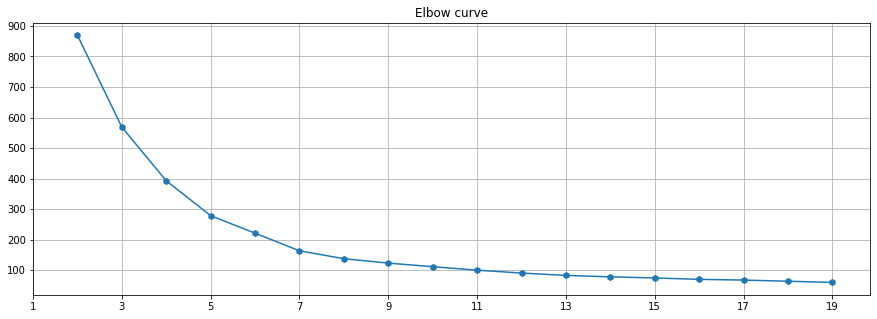

In [10]:

def plot_score_kmeans(df,metod,title):
    scors = []
    for k in range(2, 20):
        met = metod(k)
        met.fit(df)
        scors.append(met.inertia_)
    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2, 20), scors,marker='h')
    plt.xticks(np.arange(1,21, 2))
    plt.grid(True)
    plt.title(title)

plot_score_kmeans(df,KMeans,title = 'Elbow curve')

## Metoda Silhouette

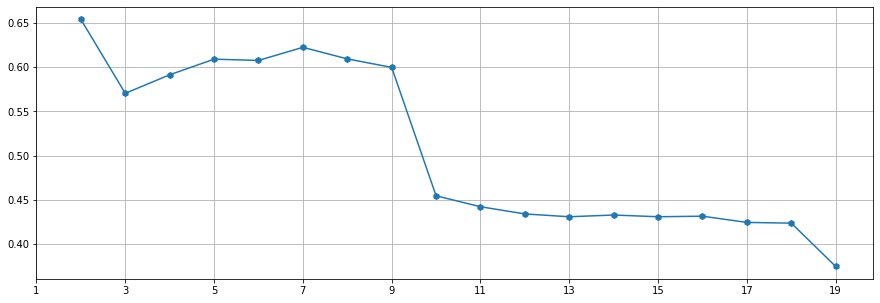

In [11]:

def plot_score(df,metod,metric,title):
    scors = []
    for k in range(2, 20):
        met = metod(k)
        label = met.fit_predict(df)
        scors.append(metric(df,label))
    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2, 20), scors,marker='h')
    plt.xticks(np.arange(1,21, 2))
    plt.grid(True)

model = KMeans  
plot_score(df,model, silhouette_score,'Silhouette_score')

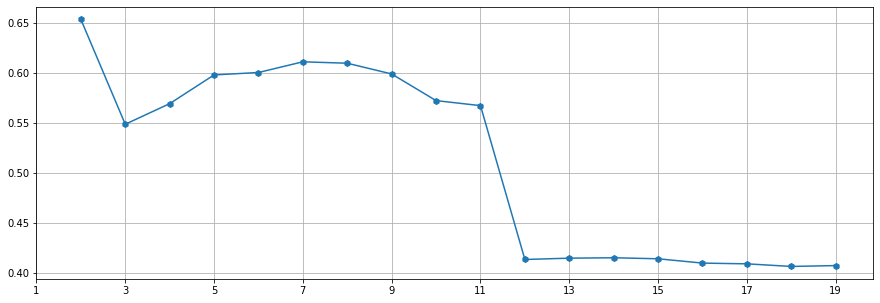

In [12]:

def plot_score(df,metod,metric,title):
    scors = []
    for k in range(2, 20):
        met = metod(k)
        label = met.fit_predict(df)
        scors.append(metric(df,label))
    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2, 20), scors,marker='h')
    plt.xticks(np.arange(1,21, 2))
    plt.grid(True)

model = AgglomerativeClustering 
plot_score(df,model, silhouette_score,'Silhouette_score')

## Indeks Calinskiego-Harabasza

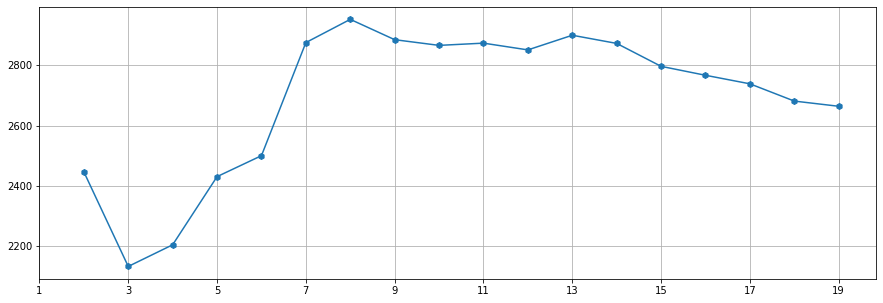

In [13]:
plot_score(df,KMeans,calinski_harabasz_score,'Calinski-Harabasz score')

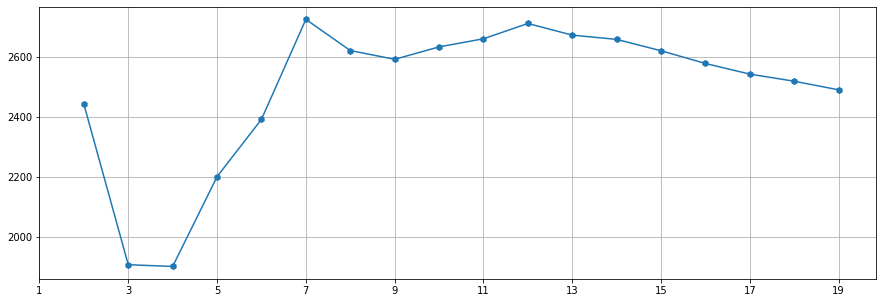

In [14]:
plot_score(df,AgglomerativeClustering,calinski_harabasz_score,'Calinski-Harabasz score')

Biorąc pod uwagę wyniki osiągnietęte przez wszystkie 3 indeksy zdecyduję się ogarniczyć możliwe wartości k do 7 oraz 8, jako dające najwyższe wyniki metryk.

## Klasteryzacja

Zdecydowałem się użyć dwóch metod klasteryzacji:
   * KMeans
   * AgglomerativeClustering

## KMeans

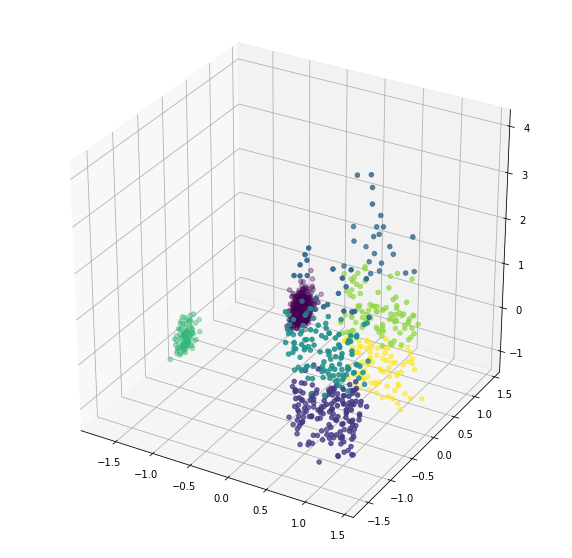

In [51]:
def plot3D_scores(df,lab):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    z = df.iloc[:, 2]
    ax.scatter3D(x, y, z,c=lab)
Kmean_7 = KMeans(7)
label_Kmean_7 = Kmean_7.fit_predict(df)
plot3D_scores(df,label_Kmean_7)

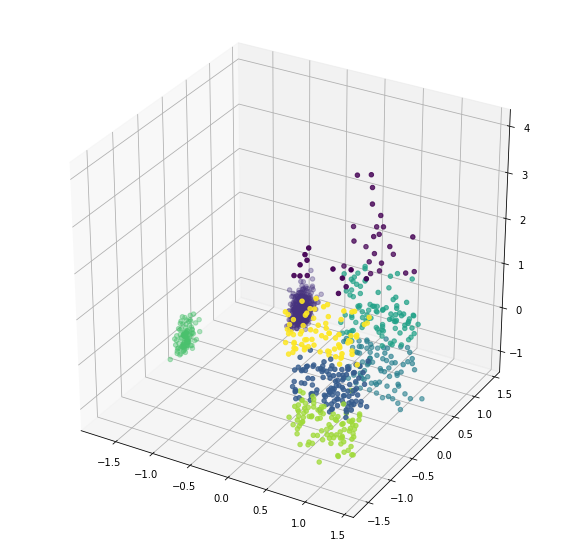

In [53]:
Kmean_8 = KMeans(8)
label_Kmean_8 = Kmean_8.fit_predict(df)
plot3D_scores(df,label_Kmean_8)

Przez to ze rysunki są w 3D, to cięzko o ocenę klasteryzacji, aczkolwiek wydaje się ona dość rozsądna.

## AgglomerativeClustering

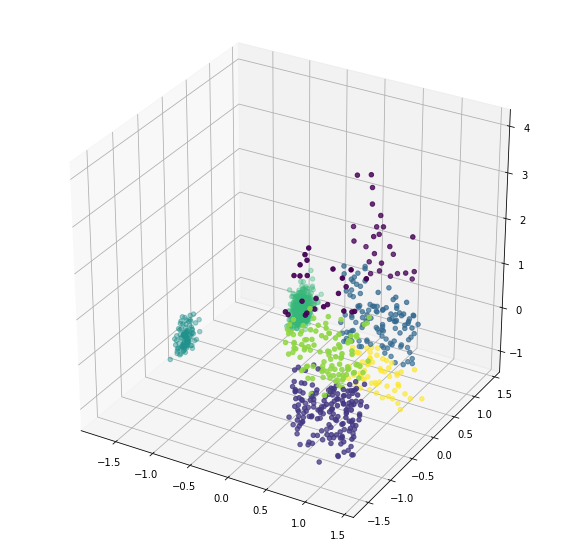

In [67]:
AC_7 = AgglomerativeClustering(7)
label_AC_7 = AC_7.fit_predict(df)
plot3D_scores(df,label_AC_7)

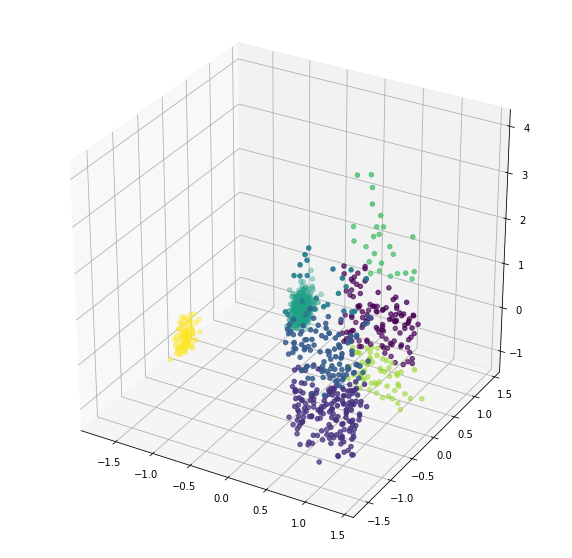

In [68]:
AC_8  = AgglomerativeClustering(8)
label_AC_8 = AC_8.fit_predict(df)
plot3D_scores(df,label_AC_8)

Klastry są dość podobne, do tych uzyskanych przez KMeans.

## Podsumowanie

Uzyskane przez algorytmy wyniki ocenię używając indeksu Calinskiego-Harabasza, aby wyłonić algorytm z najlepszym wynikiem.

In [70]:
print(f'Wynik uzyskany przez Kmeans dla k=7 to :{calinski_harabasz_score(df,label_Kmean_7)}')
print(f'Wynik uzyskany przez Kmeans dla k=8 to :{calinski_harabasz_score(df,label_Kmean_8)}')
print(f'Wynik uzyskany przez AgglomerativeClustering dla k=7 to : {calinski_harabasz_score(df,label_SC_7)}')
print(f'Wynik uzyskany przez AgglomerativeClustering dla k=8 to : {calinski_harabasz_score(df,label_SC_8)}')

Wynik uzyskany przez Kmeans dla k=7 to :2874.7588962019886
Wynik uzyskany przez Kmeans dla k=8 to :2951.632580986589
Wynik uzyskany przez AgglomerativeClustering dla k=7 to : 2724.619128189902
Wynik uzyskany przez AgglomerativeClustering dla k=8 to : 2620.799915753825


Jako decydującą metrykę zdecydowałem się użyć indeksu Calinskiego - Harabasza. Wyniki wyszły wysokie dla wszystkich metod, ale najlepszy wynik został osiągnięty dla metody KMeans z 8 klastrami.